### pycellerator demo.ipynb ###

demonstrates some basic features of pycellerator

In [1]:
from cellerator import cellerator as c
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

### Read, Translate, and Solve a Cellerator Model

In [2]:
model="Gold1.model"

In [3]:
c.PrintModel(model)

# Goldbeter, A. A minimal cascade model for the mitotic
# oscillator involving cyclin and cdc2 kinase. Proc. Natl.
# Acad. Sci. USA 88:9107-1101 (1991).
$REACTIONS
 [C <-> Nil, rates[kd, vi]]
 [C |--> Nil, mod[X], Hill[vd, 1, Kd, 0,1 ]]
 [M |--> Nil, mod[Nil], Hill[v2, 1, K2, 0, 1]]
 [X |--> Nil, mod[Nil], Hill[v4, 1, K4, 0, 1]]
 [Nil -> X, "vm3*f(M,X)"]
 [C |-> M, Hill["vm1*g(M)", 1, Kc, 0, 1]]
$IC
 C = 0.1
 M = 0.2
 X = 0.3
$FUNCTIONS
 f(m,x) =  m * (1-x)/(K3+1-x)
 g(m) = (1-m)/(K1+1-m)
$RATES
 vd = 0.1
 vi = 0.023
 v2 = 0.167
 v4 = 0.1
 vm1 = 0.5
 vm3 = 0.2
 kd = 0.00333
 K1 = 0.1
 K2 = 0.1
 K3 = 0.1
 K4 = 0.1
 Kc = 0.3
 Kd = 0.02



In [4]:
c.PrintODES(model)

f = lambda m,x :m*(-x + 1)/(-x + 1.1)
g = lambda m :(-m + 1)/(-m + 1.1)
X' = -1.0*X**1.0*v4/(K4**1.0 + 1.0*X**1.0) + vm3*f(M, X)
C' = -C*kd - 1.0*C**1.0*X*vd/(1.0*C**1.0 + Kd**1.0) + vi
M' = 1.0*C**1.0*vm1*g(M)/(1.0*C**1.0 + Kc**1.0) - 1.0*M**1.0*v2/(K2**1.0 + 1.0*M**1.0)


In [5]:
t, v, s  = c.Solve(model, step=.2)

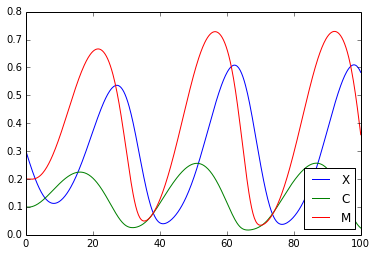

In [6]:
someplot=c.PlotAll(t,v,s,loc="lower right",bg="white")

### print first 10 values of t and s to demonstrate content of output ###


In [7]:
t[:10], v, s[:10]

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 ['X', 'C', 'M'],
 array([[ 0.3       ,  0.1       ,  0.2       ],
        [ 0.29205421,  0.09960163,  0.19992179],
        [ 0.28421706,  0.09933763,  0.19979259],
        [ 0.27648963,  0.09920492,  0.1996361 ],
        [ 0.26887383,  0.09920048,  0.19947465],
        [ 0.26137241,  0.09932137,  0.19932923],
        [ 0.25398888,  0.09956472,  0.19921952],
        [ 0.24672742,  0.09992768,  0.19916388],
        [ 0.23959283,  0.10040743,  0.19917939],
        [ 0.2325905 ,  0.10100117,  0.19928188]]))

<h1>Parametric Scan</h1>

In [8]:
variables, pscan=c.Solve(model, scan=["Kc",0.1,0.4,0.01])

In [9]:
print variables

['X', 'C', 'M']


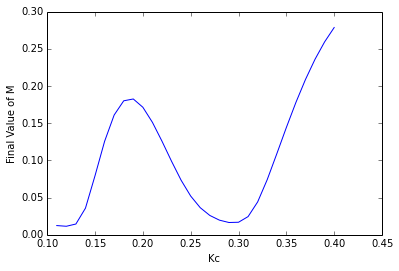

In [10]:
pscan = np.array(pscan)
kvals=pscan[:,0]; MVals=pscan[:,2]
plt.plot(kvals, MVals)
plt.xlabel("Kc"); plt.ylabel("Final Value of M")

<h1>Parametric Plots of Variables against one another </h1>

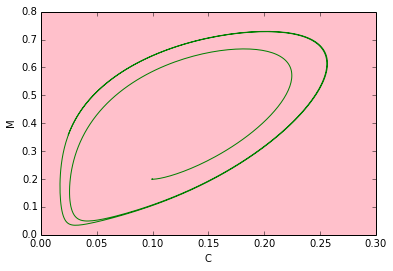

In [11]:
c.PlotParametric(t,v,s,1,2, color="Green", bg="pink")

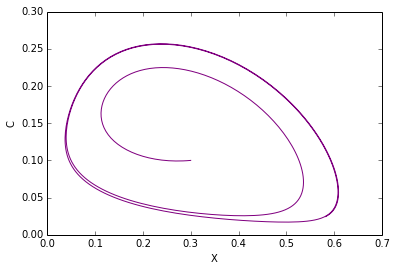

In [12]:
c.PlotParametric(t,v,s,"X","C",color="Purple", bg="white")

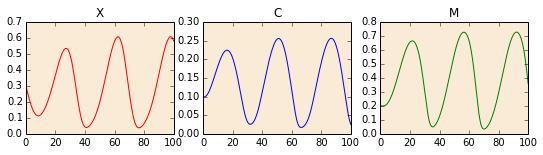

In [20]:
c.PlotSize(9, 2)  # change the plot size
someplots=c.PlotColumns(t,v,s, ncols=3, colors=["red","blue","green"])

<h2> Example of changing the default figure size

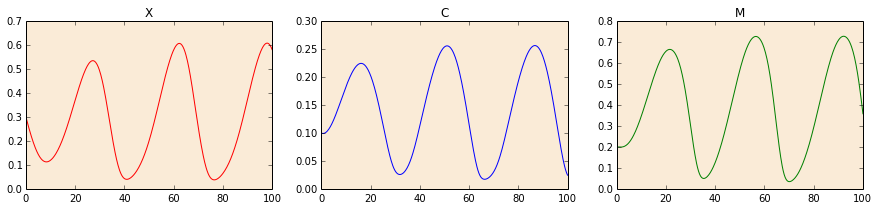

In [21]:
mpl.rcParams["figure.figsize"]=15, 3  # another way of changing the plot size
someotherplots=c.PlotColumns(t,v,s,  colors=["red","blue","green"])

<h1>Edit a model as text in the notebook rather than in an external file

In [22]:
r="""
[C <-> Nil, rates[kd, vi]]
 [C |--> Nil, mod[X], Hill[vd, 1, Kd, 0,1 ]]
 [M |--> Nil, mod[Nil], Hill[v2, 1, K2, 0, 1]]
 [X |--> Nil, mod[Nil], Hill[v4, 1, K4, 0, 1]]
 [Nil -> X, P]
 [C |-> M, Hill["vm1*g(M)", 1, Kc, 0, 1]]
 """


In [23]:
ic="""C = 0.1;M = 0.2; X = 0.3"""
rates="""
 vd = 0.1
 vi = 0.023
 v2 = 0.167; v4 = 0.1
 vm1 = 0.5; vm3 = 0.2
 kd = 0.00333
 K1 = 0.1; K2 = 0.1; K3 = 0.1
 K4 = 0.1
 Kc = 0.3
 Kd = 0.02"""
ass="""P =  M * (1-X)/(K3+1-X)"""
func="""g(m) = (1-m)/(K1+1-m)"""

The function newModel creates a model from text strings rather than by reading a file

In [24]:
q = c.newModel(r, ic, rates, func, ass)

In [25]:
t,v,s=c.Solve(q,step=1, duration=200)

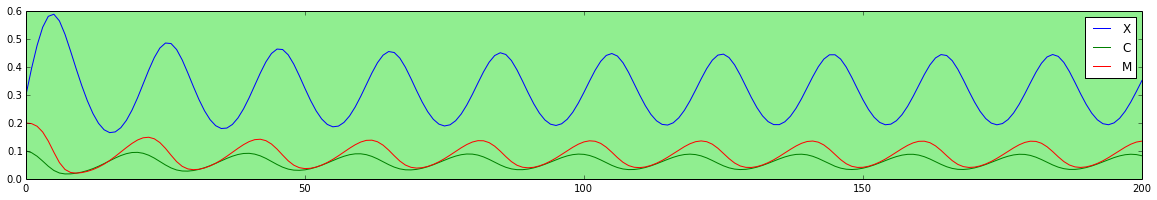

In [34]:
c.PlotSize(20,3)
newplot=c.PlotAll(t,v,s,bg="lightgreen")

<H1>Export Model file to SBML

In [35]:
newsbmlfile = c.GenerateSBML("Gold1.model", output="foo.xml")
print newsbmlfile

/home/mathman/code/pycellerator/pycellerator/foo1.xml


In [36]:
c.PrintSBML(newsbmlfile)

<?xml version="1.0" encoding="UTF-8"?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model substanceUnits="item" timeUnits="dimensionless" extentUnits="item">
    <listOfFunctionDefinitions>
      <functionDefinition id="f">
        <math xmlns="http://www.w3.org/1998/Math/MathML">
          <lambda>
            <bvar>
              <ci> m </ci>
            </bvar>
            <bvar>
              <ci> x </ci>
            </bvar>
            <apply>
              <divide/>
              <apply>
                <times/>
                <ci> m </ci>
                <apply>
                  <plus/>
                  <apply>
                    <minus/>
                    <ci> x </ci>
                  </apply>
                  <cn type="integer"> 1 </cn>
                </apply>
              </apply>
              <apply>
                <plus/>
                <apply>
                  <minus/>
                  <ci> x </ci>
                </a

In [37]:
newmodelfile=c.ConvertSBML("foo.xml")
print newmodelfile

/home/mathman/code/pycellerator/pycellerator/newmodel3.model


In [38]:
T,V,S=c.Solve(newmodelfile)

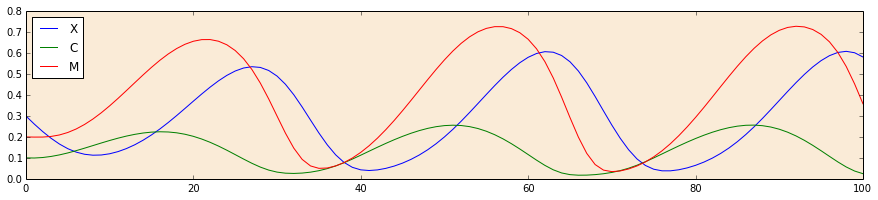

In [39]:
mpl.rcParams["figure.figsize"]=15, 3;
c.PlotAll(T,V,S)

Generate a Cellerator Mathematica Notebook from a Model

The inverse translation is implemented in the Cellerator function TextArrow; from within Mathematica, to generate the arrow forms for a python model file use "TextArrow/@model" 

In [40]:
nb = c.ToMathematica("Gold1.model")
print nb

6  lines read from  /home/mathman/code/pycellerator/pycellerator/Gold1.model
/home/mathman/code/pycellerator/pycellerator/translated-model2.nb


The PrintMathematican function serves no operational function, it just gives a pretty-print look into the contents of the file.

In [41]:
c.PrintMathematica(nb)

<<xlr8r.m;
model = {List[RightArrowLeftArrow[Plus[C], Plus[Nil]], kd, vi],
 List[Overscript[RightTeeArrow[C, Nil], X], Hill[vd, 1, Kd, 0, 1]],
 List[Overscript[RightTeeArrow[M, Nil], Nil], Hill[v2, 1, K2, 0, 1]],
 List[Overscript[RightTeeArrow[X, Nil], Nil], Hill[v4, 1, K4, 0, 1]],
 List[ShortRightArrow[Plus[Nil], Plus[X]], vm3*f(M,X)],
 List[RightTeeArrow[C, M], Hill[vm1*g(M), 1, Kc, 0, 1]]}/.{Nil->\[EmptySet],inf->\[Infinity]};
therates = {Kc->0.3,
 vd->0.1,
 kd->0.00333,
 vi->0.023,
 Kd->0.02,
 K1->0.1,
 K3->0.1,
 K2->0.1,
 v2->0.167,
 v4->0.1,
 K4->0.1,
 vm3->0.2,
 vm1->0.5};
theics = {X->0.3,
 C->0.1,
 M->0.2};

